In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados

modelo4 = load_model('mnist_cnn_model_completa.h5')
modelo5 = load_model('mnist_cnn_model_derecha.h5')
modelo6 = load_model('mnist_cnn_model_izquierda.h5')
modelo7 = load_model('mnist_cnn_model_abajo.h5')
modelo8 = load_model('mnist_cnn_model_arriba.h5')



# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')

# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values

# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)



predicciones_csv2_modelo4 = modelo4.predict(datos_csv2)
predicciones_csv2_modelo5 = modelo5.predict(datos_csv2)
predicciones_csv2_modelo6 = modelo6.predict(datos_csv2)
predicciones_csv2_modelo7 = modelo7.predict(datos_csv2)
predicciones_csv2_modelo8 = modelo8.predict(datos_csv2)

# Obtener las clases predichas

clases_predichas_csv2_modelo4 = np.argmax(predicciones_csv2_modelo4, axis=1)
clases_predichas_csv2_modelo5 = np.argmax(predicciones_csv2_modelo5, axis=1)
clases_predichas_csv2_modelo6 = np.argmax(predicciones_csv2_modelo6, axis=1)
clases_predichas_csv2_modelo7 = np.argmax(predicciones_csv2_modelo7, axis=1)
clases_predichas_csv2_modelo8 = np.argmax(predicciones_csv2_modelo8, axis=1)



# Puedes guardar las predicciones junto con las etiquetas verdaderas en un nuevo archivo CSV

resultados_csv2 = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv2,
    'Prediccion_Modelo4': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo7': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8': clases_predichas_csv2_modelo8,

})


resultados_csv2.to_csv('resultados_csv2.csv', index=False)
# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
   
    'Prediccion_Modelo4_csv2': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5_csv2': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6_csv2': clases_predichas_csv2_modelo6,
    
    'Prediccion_Modelo7_csv2': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8_csv2': clases_predichas_csv2_modelo8,
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_agenteuno_derecha.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 2s 3ms/step


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_agenteuno_derecha.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.5851 - accuracy: 0.4685 - val_loss: 1.4453 - val_accuracy: 0.5148
Epoch 2/40
600/600 [==============================] - 1s 1ms/step - loss: 1.3614 - accuracy: 0.5385 - val_loss: 1.3252 - val_accuracy: 0.5404
Epoch 3/40
600/600 [==============================] - 1s 1ms/step - loss: 1.2958 - accuracy: 0.5618 - val_loss: 1.2673 - val_accuracy: 0.5667
Epoch 4/40
600/600 [==============================] - 1s 1ms/step - loss: 1.2445 - accuracy: 0.5803 - val_loss: 1.2394 - val_accuracy: 0.5819
Epoch 5/40
600/600 [==============================] - 1s 1ms/step - loss: 1.2048 - accuracy: 0.5904 - val_loss: 1.1928 - val_accuracy: 0.5917
Epoch 6/40
600/600 [==============================] - 1s 1ms/step - loss: 1.1658 - accuracy: 0.6036 - val_loss: 1.1630 - val_accuracy: 0.6137
Epoch 7/40
600/600 [==============================] - 1s 1ms/step - loss: 1.1417 - accuracy: 0.6136 - val_loss: 1.1423 - val_accuracy: 0.6154
Epoch 

In [1]:
import numpy as np
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('mnist_pred.csv')

# Separar características y etiquetas
x_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values

# Reshape de las imágenes a 28x28
x_train = x_train.reshape(-1, 28, 28)

# Crear DataFrames para las partes superior e inferior con fondo negro al otro lado
upper_with_padding = []
lower_with_padding = []

for image in x_train:
    mid = image.shape[0] // 2  # 50% para la parte superior
    mid2 = int(image.shape[0] * (3/4))
    sample_upper = image[mid:, :]
    sample_lower = image[:mid, :]  #50% para la parte inferior
    
    # Crear imágenes de 28x28 con fondo negro
    upper_with_padding_image = np.zeros((28, 28))
    lower_with_padding_image = np.zeros((28, 28))
    
    # Copiar la parte superior e inferior a las imágenes con fondo negro
    upper_with_padding_image[mid:, :] = sample_upper
    lower_with_padding_image[:mid, :] = sample_lower
    
    upper_with_padding.append(upper_with_padding_image.flatten())
    lower_with_padding.append(lower_with_padding_image.flatten())

# Convertir a DataFrames
upper_df = pd.DataFrame(data=upper_with_padding)
lower_df = pd.DataFrame(data=lower_with_padding)

# Agregar las etiquetas originales a los DataFrames
upper_df['label'] = y_train
lower_df['label'] = y_train

# Guardar los DataFrames en archivos CSV
upper_df.to_csv('mnist_arribasinlado_test.csv', index=False)
lower_df.to_csv('mnist_abajosinlado_test.csv', index=False)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a function to display images
def display_image(image):
    # Replace this with your actual code to display images
    plt.imshow(image, cmap='gray')
    plt.show()

matriz_28x28 = pd.read_csv("mnist_pred.csv")

# Convert DataFrame to NumPy array, excluding the label column
matriz_28x28_values = matriz_28x28.iloc[:, 1:].values.reshape(-1, 28, 28)

# Specify the number of pixels for 50% coverage
num_pixels = 14

# Operation: Cover from above
matriz_tapar_arriba = np.ones((28, 28))
matriz_tapar_arriba[:num_pixels, :] = 0
matriz_resultante_arriba = matriz_28x28_values * matriz_tapar_arriba

# Concatenate modified pixel values with original labels
modified_data_with_labels = np.concatenate([matriz_resultante_arriba.reshape(-1, 28 * 28), matriz_28x28.iloc[:, :1].values], axis=1)

# Reorder columns to have the label at the end
column_order = list(matriz_28x28.columns[1:]) + ['label']
modified_df = pd.DataFrame(modified_data_with_labels, columns=column_order)

# Display original and generated images
display_image(matriz_28x28_values[0])
display_image(matriz_resultante_arriba[0])

# Save modifications to a new CSV file with the label at the end
modified_df.to_csv('modificacion_abajo_test.csv', index=False)

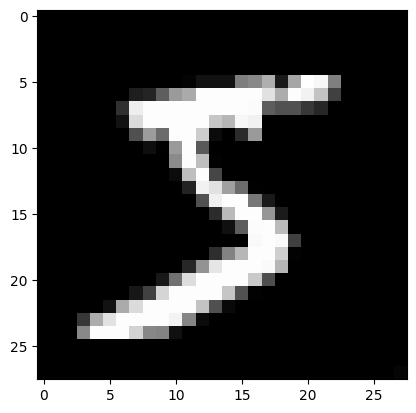

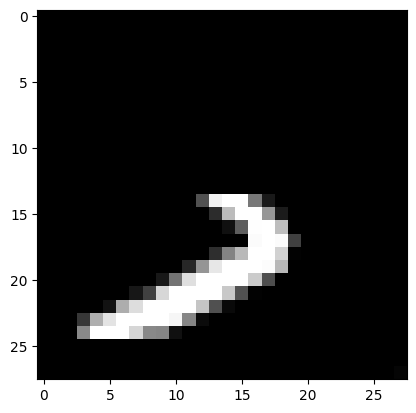

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a function to display images
def display_image(image):
    # Replace this with your actual code to display images
    plt.imshow(image, cmap='gray')
    plt.show()

# Leer el archivo CSV
matriz_28x28 = pd.read_csv("mnist_trainnuevo.csv")

# Extraer la columna 'label'
labels = matriz_28x28['label']

# Convertir el DataFrame a un array NumPy, excluyendo la columna 'label'
matriz_28x28_values = matriz_28x28.iloc[:, 1:].values.reshape(-1, 28, 28)

# Especificar el número de píxeles para la cobertura del 50%
num_pixels = 14

# Operación: Cubrir desde arriba
matriz_tapar_arriba = np.ones((28, 28))
matriz_tapar_arriba[:num_pixels, :] = 0
matriz_resultante_arriba = matriz_28x28_values * matriz_tapar_arriba

# Crear un nuevo DataFrame con los píxeles modificados y la columna 'label'
modified_df = pd.DataFrame(matriz_resultante_arriba.reshape(-1, 28 * 28))

# Agregar la columna 'label' al nuevo DataFrame
modified_df['label'] = labels

# Reordenar las columnas para tener la columna 'label' al final
column_order = list(range(28 * 28)) + ['label']
modified_df = modified_df[column_order]

# Display original and generated images
display_image(matriz_28x28_values[0])
display_image(matriz_resultante_arriba[0])

# Guardar las modificaciones en un nuevo archivo CSV
modified_df.to_csv('mnistt_abajo.csv', index=False)


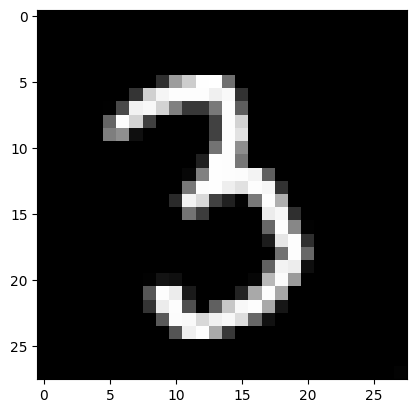

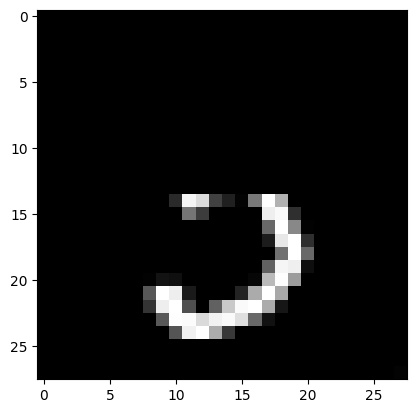

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a function to display images
def display_image(image):
    # Replace this with your actual code to display images
    plt.imshow(image, cmap='gray')
    plt.show()

# Leer el archivo CSV
matriz_28x28 = pd.read_csv("mnist_pred.csv")

# Extraer la columna 'label'
labels = matriz_28x28['label']

# Convertir el DataFrame a un array NumPy, excluyendo la columna 'label'
matriz_28x28_values = matriz_28x28.iloc[:, 1:].values.reshape(-1, 28, 28)

# Especificar el número de píxeles para la cobertura del 50%
num_pixels = 14

# Operación: Cubrir desde arriba
matriz_tapar_arriba = np.ones((28, 28))
matriz_tapar_arriba[:num_pixels, :] = 0
matriz_resultante_arriba = matriz_28x28_values * matriz_tapar_arriba

# Crear un nuevo DataFrame con los píxeles modificados y la columna 'label'
modified_df = pd.DataFrame(matriz_resultante_arriba.reshape(-1, 28 * 28))

# Agregar la columna 'label' al nuevo DataFrame
modified_df['label'] = labels

# Reordenar las columnas para tener la columna 'label' al final
column_order = list(range(28 * 28)) + ['label']
modified_df = modified_df[column_order]

# Display original and generated images
display_image(matriz_28x28_values[0])
display_image(matriz_resultante_arriba[0])

# Guardar las modificaciones en un nuevo archivo CSV
modified_df.to_csv('mnistt_abajo_test.csv', index=False)


In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados
modelo1 = load_model('mnist_cnn_model_completa.h5')  # Reemplaza 'modelo1.h5' con el nombre real de tu modelo
modelo2 = load_model('mnist_cnn_model_derecha.h5')
modelo3 = load_model('mnist_cnn_model_izquierda.h5')
modelo4 = load_model('mnist_cnn_model_abajo.h5')
modelo5 = load_model('mnist_cnn_model_arriba.h5')

modelo6 = load_model('mnist_cnn_model_completa.h5')
modelo7 = load_model('mnist_cnn_model_derecha.h5')
modelo8 = load_model('mnist_cnn_model_izquierda.h5')
modelo9 = load_model('mnist_cnn_model_abajo.h5')
modelo10 = load_model('mnist_cnn_model_arriba.h5')

modelo11 = load_model('mnist_cnn_model_completa.h5')
modelo12 = load_model('mnist_cnn_model_derecha.h5')
modelo13 = load_model('mnist_cnn_model_izquierda.h5')
modelo14 = load_model('mnist_cnn_model_abajo.h5')
modelo15 = load_model('mnist_cnn_model_arriba.h5')

modelo16 = load_model('mnist_cnn_model_completa.h5')
modelo17 = load_model('mnist_cnn_model_izquierda.h5')
modelo18 = load_model('mnist_cnn_model_derecha.h5')
modelo19 = load_model('mnist_cnn_model_abajo.h5')
modelo20 = load_model('mnist_cnn_model_arriba.h5')
# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')
# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values
etiquetas_verdaderas_csv3 = datos_csv3['label'].values
etiquetas_verdaderas_csv4 = datos_csv4['label'].values
# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)
datos_csv3 = datos_csv3.drop('label', axis=1)
datos_csv4 = datos_csv4.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)
datos_csv3 = datos_csv3.values.reshape(-1, 28, 28, 1)
datos_csv4 = datos_csv4.values.reshape(-1, 28, 28, 1)

# Realizar predicciones con los modelos
predicciones_csv1_modelo1 = modelo1.predict(datos_csv1)
predicciones_csv1_modelo2 = modelo2.predict(datos_csv1)
predicciones_csv1_modelo3 = modelo3.predict(datos_csv1)
predicciones_csv1_modelo4 = modelo4.predict(datos_csv1)
predicciones_csv1_modelo5 = modelo5.predict(datos_csv1)


predicciones_csv2_modelo6 = modelo6.predict(datos_csv2)
predicciones_csv2_modelo7 = modelo7.predict(datos_csv2)
predicciones_csv2_modelo8 = modelo8.predict(datos_csv2)
predicciones_csv2_modelo9 = modelo9.predict(datos_csv2)
predicciones_csv2_modelo10 = modelo10.predict(datos_csv2)

predicciones_csv3_modelo11 = modelo11.predict(datos_csv3)
predicciones_csv3_modelo12 = modelo12.predict(datos_csv3)
predicciones_csv3_modelo13 = modelo13.predict(datos_csv3)
predicciones_csv3_modelo14 = modelo14.predict(datos_csv3)
predicciones_csv3_modelo15 = modelo15.predict(datos_csv3)

predicciones_csv4_modelo16 = modelo16.predict(datos_csv4)
predicciones_csv4_modelo17 = modelo17.predict(datos_csv4)
predicciones_csv4_modelo18 = modelo18.predict(datos_csv4)
predicciones_csv4_modelo19 = modelo19.predict(datos_csv4)
predicciones_csv4_modelo20 = modelo20.predict(datos_csv4)

# Obtener las clases predichas
clases_predichas_csv1_modelo1 = np.argmax(predicciones_csv1_modelo1, axis=1)
clases_predichas_csv1_modelo2 = np.argmax(predicciones_csv1_modelo2, axis=1)
clases_predichas_csv1_modelo3 = np.argmax(predicciones_csv1_modelo3, axis=1)
clases_predichas_csv1_modelo4 = np.argmax(predicciones_csv1_modelo4, axis=1)
clases_predichas_csv1_modelo5 = np.argmax(predicciones_csv1_modelo5, axis=1)


clases_predichas_csv2_modelo6 = np.argmax(predicciones_csv2_modelo6, axis=1)
clases_predichas_csv2_modelo7 = np.argmax(predicciones_csv2_modelo7, axis=1)
clases_predichas_csv2_modelo8 = np.argmax(predicciones_csv2_modelo8, axis=1)
clases_predichas_csv2_modelo9 = np.argmax(predicciones_csv2_modelo9, axis=1)
clases_predichas_csv2_modelo10 = np.argmax(predicciones_csv2_modelo10, axis=1)

clases_predichas_csv3_modelo11 = np.argmax(predicciones_csv3_modelo11, axis=1)
clases_predichas_csv3_modelo12 = np.argmax(predicciones_csv3_modelo12, axis=1)
clases_predichas_csv3_modelo13 = np.argmax(predicciones_csv3_modelo13, axis=1)
clases_predichas_csv3_modelo14 = np.argmax(predicciones_csv3_modelo14, axis=1)
clases_predichas_csv3_modelo15 = np.argmax(predicciones_csv3_modelo15, axis=1)

clases_predichas_csv4_modelo16 = np.argmax(predicciones_csv4_modelo16, axis=1)
clases_predichas_csv4_modelo17 = np.argmax(predicciones_csv4_modelo17, axis=1)
clases_predichas_csv4_modelo18 = np.argmax(predicciones_csv4_modelo18, axis=1)
clases_predichas_csv4_modelo19 = np.argmax(predicciones_csv4_modelo19, axis=1)
clases_predichas_csv4_modelo20 = np.argmax(predicciones_csv4_modelo20, axis=1)


# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
    'Prediccion_Modelo1_csv1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2_csv1': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3_csv1': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo4_csv2': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5_csv2': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6_csv2': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo9_csv1': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10_csv1': clases_predichas_csv1_modelo10,
    'Prediccion_Modelo7_csv2': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8_csv2': clases_predichas_csv2_modelo8,
    'Prediccion_Modelo11_csv3': clases_predichas_csv3_modelo11,
    'Prediccion_Modelo12_csv3': clases_predichas_csv3_modelo12,
    'Prediccion_Modelo13_csv3': clases_predichas_csv3_modelo13,
    'Prediccion_Modelo14_csv3': clases_predichas_csv3_modelo14,
    'Prediccion_Modelo15_csv3': clases_predichas_csv3_modelo15,
    'Prediccion_Modelo16_csv4': clases_predichas_csv4_modelo16,
    'Prediccion_Modelo17_csv4': clases_predichas_csv4_modelo17,
    'Prediccion_Modelo18_csv4': clases_predichas_csv4_modelo18,
    'Prediccion_Modelo19_csv4': clases_predichas_csv4_modelo19,
    'Prediccion_Modelo20_csv4': clases_predichas_csv4_modelo20,
    
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_cuatroagentes.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 3s 3ms/step


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_cuatroagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.0347 - accuracy: 0.6635 - val_loss: 0.8554 - val_accuracy: 0.7233
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7082 - accuracy: 0.7834 - val_loss: 0.6637 - val_accuracy: 0.7987
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.6082 - accuracy: 0.8137 - val_loss: 0.6247 - val_accuracy: 0.8062
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.8320 - val_loss: 0.5509 - val_accuracy: 0.8352
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5111 - accuracy: 0.8429 - val_loss: 0.5111 - val_accuracy: 0.8483
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.8570 - val_loss: 0.5083 - val_accuracy: 0.8427
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.8612 - val_loss: 0.4703 - val_accuracy: 0.8558
Epoch 

Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.0248 - accuracy: 0.6666 - val_loss: 0.8309 - val_accuracy: 0.7404
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.7822 - val_loss: 0.6877 - val_accuracy: 0.7783
Epoch 3/40
600/600 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.8101 - val_loss: 0.6822 - val_accuracy: 0.7856
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.8301 - val_loss: 0.5429 - val_accuracy: 0.8396
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.8461 - val_loss: 0.5084 - val_accuracy: 0.8506
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.8540 - val_loss: 0.5043 - val_accuracy: 0.8487
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8645 - val_loss: 0.4796 - val_accuracy: 0.8535
Epoch 

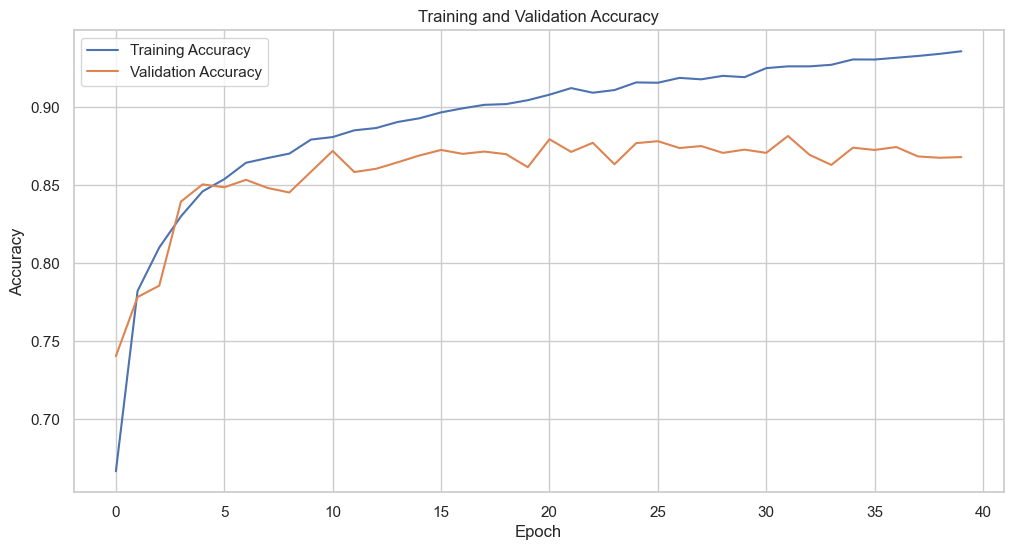

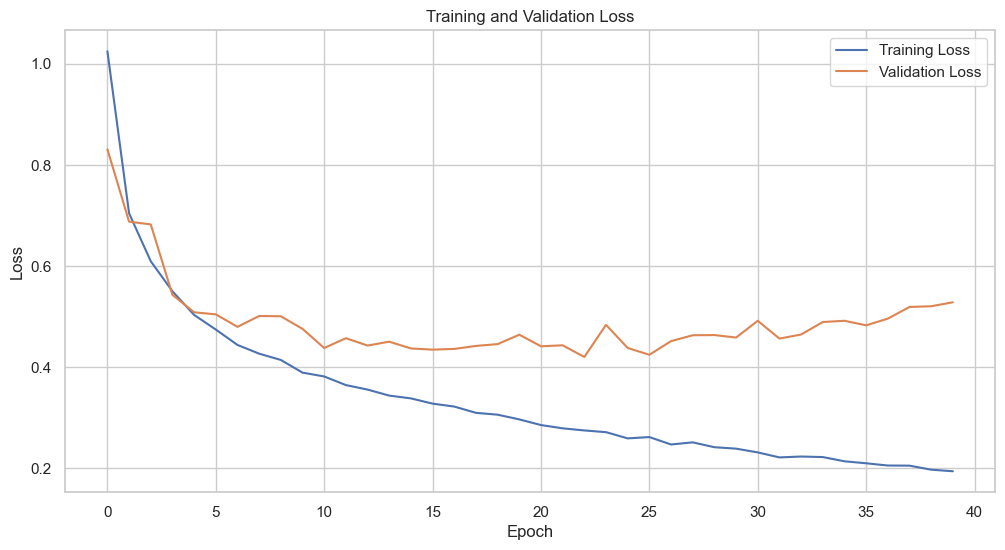

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_cuatroagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia

# Graficar la precisión y pérdida
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la precisión
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot_cautroagentes.png')  # Guardar la gráfica de precisión
plt.show()

# Graficar la pérdida
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot_cuatroagentes.png')  # Guardar la gráfica de pérdida
plt.show()


In [9]:
import pandas as pd

# Lee el archivo CSV
archivo_csv = 'mnist_derechageneral_test.csv'
datos = pd.read_csv(archivo_csv)

# Obtiene las dimensiones de los datos
dimensiones = datos.shape

# Imprime en pantalla las dimensiones
print("Dimensiones de los datos:", dimensiones)


Dimensiones de los datos: (30000, 785)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_cuatroagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = modelo_mlp.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcular métricas de evaluación en el conjunto de prueba
precision_macro_test = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall_macro_test = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1_macro_test = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
accuracy_test = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de evaluación en el conjunto de prueba
print("Metrics (Test):")
print(f"Precision (Macro): {precision_macro_test}")
print(f"Recall (Macro): {recall_macro_test}")
print(f"F1-score (Macro): {f1_macro_test}")
print(f"Accuracy: {accuracy_test}")


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 0.8234 - accuracy: 0.7412 - val_loss: 0.6330 - val_accuracy: 0.8085
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.8263 - val_loss: 0.5430 - val_accuracy: 0.8398
Epoch 3/40
600/600 [==============================] - 1s 1ms/step - loss: 0.4903 - accuracy: 0.8525 - val_loss: 0.5163 - val_accuracy: 0.8421
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8619 - val_loss: 0.4860 - val_accuracy: 0.8533
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8714 - val_loss: 0.4584 - val_accuracy: 0.8621
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8812 - val_loss: 0.4504 - val_accuracy: 0.8619
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8852 - val_loss: 0.4382 - val_accuracy: 0.8671
Epoch 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_cuatroagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = modelo_mlp.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcular métricas de evaluación en el conjunto de prueba
precision_macro_test = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall_macro_test = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1_macro_test = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
accuracy_test = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de evaluación en el conjunto de prueba
print("Metrics (Test):")
print(f"Precision (Macro): {precision_macro_test}")
print(f"Recall (Macro): {recall_macro_test}")
print(f"F1-score (Macro): {f1_macro_test}")
print(f"Accuracy: {accuracy_test}")


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 0.8491 - accuracy: 0.7354 - val_loss: 0.6672 - val_accuracy: 0.7904
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5833 - accuracy: 0.8183 - val_loss: 0.5576 - val_accuracy: 0.8304
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.8448 - val_loss: 0.5271 - val_accuracy: 0.8410
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.8602 - val_loss: 0.4805 - val_accuracy: 0.8569
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8677 - val_loss: 0.4694 - val_accuracy: 0.8575
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8780 - val_loss: 0.4534 - val_accuracy: 0.8656
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8857 - val_loss: 0.4432 - val_accuracy: 0.8665
Epoch 

KeyboardInterrupt: 

In [ ]:
# Obtener la historia del entrenamiento
history = modelo_mlp.history.history

# Graficar la precisión y la pérdida del entrenamiento y la validación en una sola gráfica
plt.figure(figsize=(10, 6))

# Accuracy
plt.plot(history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
plt.plot(history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')

# Loss
plt.plot(history['loss'], label='Training Loss', color='orange', linestyle='-')
plt.plot(history['val_loss'], label='Validation Loss', color='orange', linestyle='--')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('training_validation_metrics.png')
plt.show()

# Imprimir las métricas de evaluación en el conjunto de prueba
print("Metrics (Test):")
print(f"Precision (Macro): {precision_macro_test}")
print(f"Recall (Macro): {recall_macro_test}")
print(f"F1-score (Macro): {f1_macro_test}")
print(f"Accuracy: {accuracy_test}")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos CSV
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')

# Mostrar un ejemplo de cada CSV
ejemplo_csv1 = datos_csv1.iloc[0].values.reshape(28, 28)  # Cambiar el índice si quieres otro ejemplo
ejemplo_csv2 = datos_csv2.iloc[0].values.reshape(28, 28)
ejemplo_csv3 = datos_csv3.iloc[0].values.reshape(28, 28)
ejemplo_csv4 = datos_csv4.iloc[0].values.reshape(28, 28)

# Plotear los ejemplos
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('CSV 1')
plt.subplot(222)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('CSV 2')
plt.subplot(223)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('CSV 3')
plt.subplot(224)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('CSV 4')
plt.tight_layout()
plt.show()

# Guardar los ejemplos en una imagen
plt.imsave('ejemplo_csv1.png', ejemplo_csv1, cmap='gray')
plt.imsave('ejemplo_csv2.png', ejemplo_csv2, cmap='gray')
plt.imsave('ejemplo_csv3.png', ejemplo_csv3, cmap='gray')
plt.imsave('ejemplo_csv4.png', ejemplo_csv4, cmap='gray')


ValueError: cannot reshape array of size 785 into shape (28,28)

In [3]:
from PIL import Image

# Cargar las imágenes individuales
imagen_csv1 = Image.open('mnist_izquierdageneral_test.csv')
imagen_csv2 = Image.open('mnist_derechageneral_test.csv')
imagen_csv3 = Image.open('mnist_arribasinlado_test.csv')
imagen_csv4 = Image.open('mnist_abajosinlado_test.csv')

# Crear una nueva imagen grande
ancho_total = imagen_csv1.width * 2
alto_total = imagen_csv1.height * 2
imagen_grande = Image.new('RGB', (ancho_total, alto_total))

# Pegar las imágenes individuales en la imagen grande
imagen_grande.paste(imagen_csv1, (0, 0))
imagen_grande.paste(imagen_csv2, (imagen_csv1.width, 0))
imagen_grande.paste(imagen_csv3, (0, imagen_csv1.height))
imagen_grande.paste(imagen_csv4, (imagen_csv1.width, imagen_csv1.height))

# Guardar la imagen grande
imagen_grande.save('imagen_grande.png')


UnidentifiedImageError: cannot identify image file 'mnist_izquierdageneral_test.csv'

In [4]:
from PIL import Image

# Cargar los datos CSV
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')

# Seleccionar el primer ejemplo de cada CSV
ejemplo_csv1 = datos_csv1.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv2 = datos_csv2.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv3 = datos_csv3.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv4 = datos_csv4.iloc[0, :-1].values.reshape(28, 28)

# Crear una nueva imagen grande
ancho_total = ejemplo_csv1.shape[1] * 2
alto_total = ejemplo_csv1.shape[0] * 2
imagen_grande = Image.new('L', (ancho_total, alto_total))

# Pegar las imágenes individuales en la imagen grande
imagen_grande.paste(Image.fromarray(ejemplo_csv1), (0, 0))
imagen_grande.paste(Image.fromarray(ejemplo_csv2), (ejemplo_csv1.shape[1], 0))
imagen_grande.paste(Image.fromarray(ejemplo_csv3), (0, ejemplo_csv1.shape[0]))
imagen_grande.paste(Image.fromarray(ejemplo_csv4), (ejemplo_csv1.shape[1], ejemplo_csv1.shape[0]))

# Guardar la imagen grande
imagen_grande.save('ejemplos_csv.png')


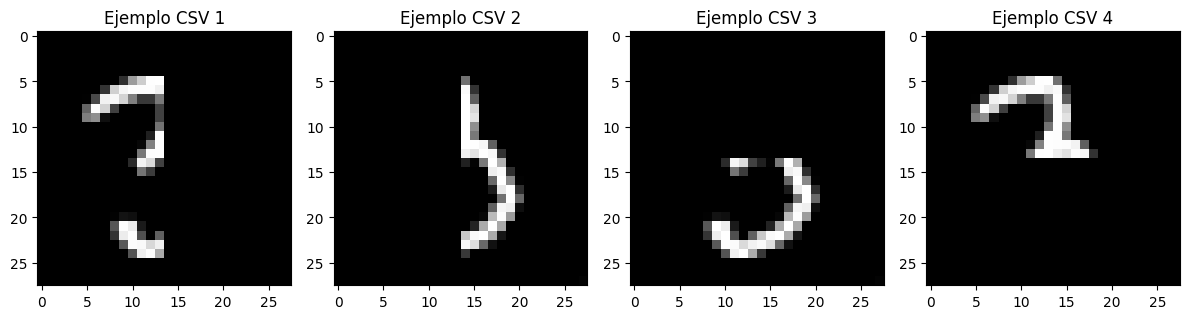

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')

# Seleccionar un ejemplo de cada CSV
ejemplo_csv1 = datos_csv1.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv2 = datos_csv2.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv3 = datos_csv3.iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv4 = datos_csv4.iloc[0, :-1].values.reshape(28, 28)

# Mostrar cada ejemplo en pantalla
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

plt.tight_layout()
plt.show()


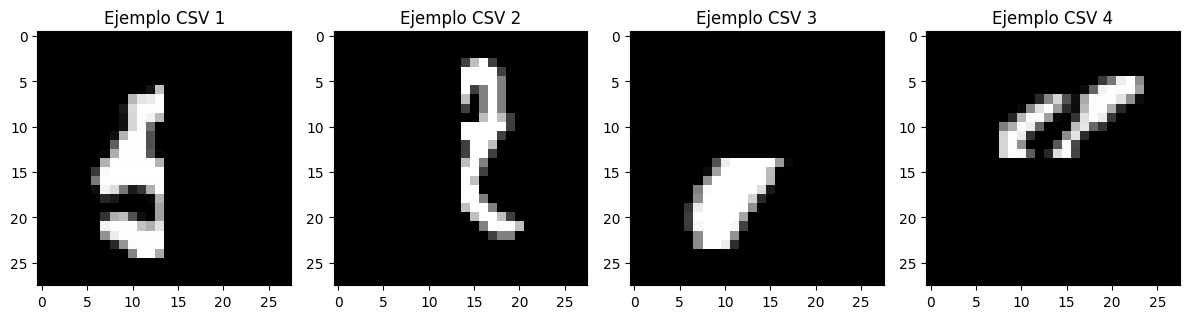

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')

# Seleccionar ejemplos aleatorios de cada CSV
ejemplo_csv1 = datos_csv1.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv2 = datos_csv2.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv3 = datos_csv3.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv4 = datos_csv4.sample(n=1).iloc[0, :-1].values.reshape(28, 28)

# Mostrar cada ejemplo en pantalla
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

plt.tight_layout()
plt.show()
# Crear una nueva figura para mostrar los ejemplos
plt.figure(figsize=(12, 4))

# Mostrar cada ejemplo en la figura
plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

# Guardar la figura tal como se muestra
plt.savefig('cuatro_ejemplos.png')

# Mostrar la figura en pantalla
plt.show()

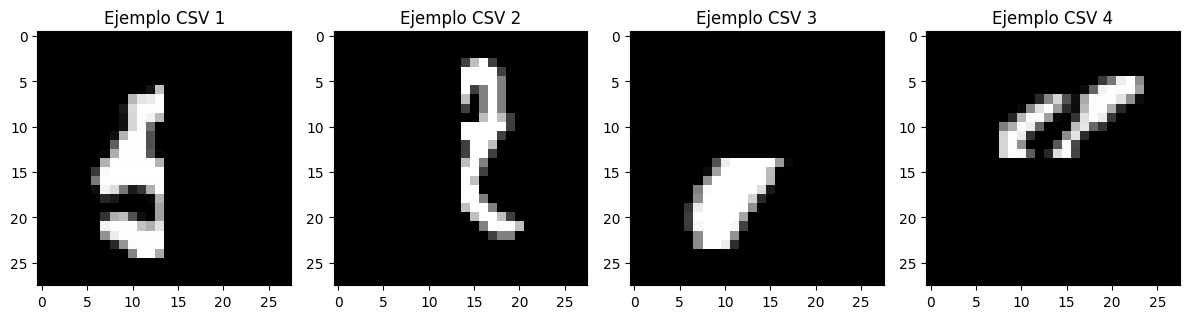

In [12]:
# Crear una nueva figura para mostrar los ejemplos
plt.figure(figsize=(12, 4))

# Mostrar cada ejemplo en la figura
plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

# Guardar la figura tal como se muestra
plt.savefig('cuatro_ejemplos.png')

# Mostrar la figura en pantalla
plt.show()


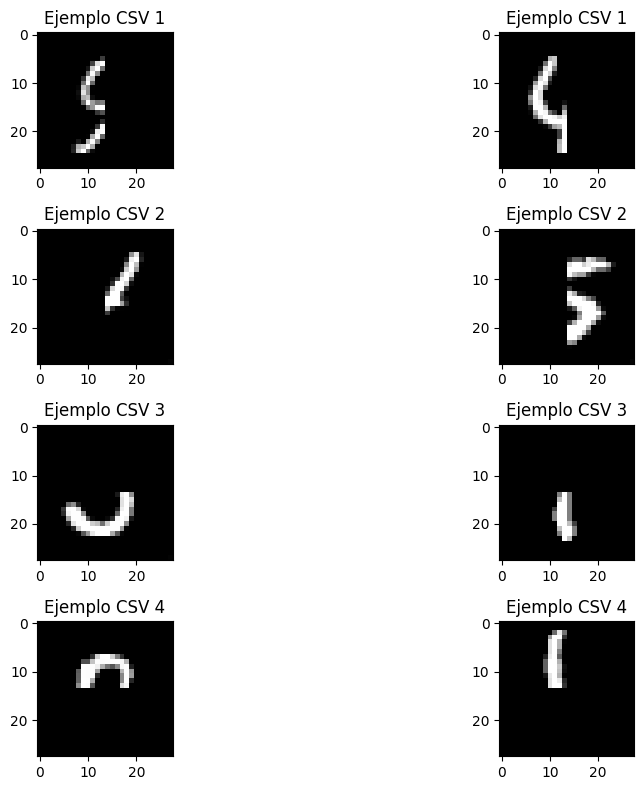

In [13]:
from PIL import Image

# Seleccionar dos ejemplos aleatorios de cada CSV
ejemplos_csv1 = datos_csv1.sample(n=2).iloc[:, :-1].values.reshape(-1, 28, 28)
ejemplos_csv2 = datos_csv2.sample(n=2).iloc[:, :-1].values.reshape(-1, 28, 28)
ejemplos_csv3 = datos_csv3.sample(n=2).iloc[:, :-1].values.reshape(-1, 28, 28)
ejemplos_csv4 = datos_csv4.sample(n=2).iloc[:, :-1].values.reshape(-1, 28, 28)

# Crear una nueva figura para mostrar los ejemplos
plt.figure(figsize=(12, 8))

# Mostrar cada ejemplo en la figura
for i, ejemplos in enumerate([ejemplos_csv1, ejemplos_csv2, ejemplos_csv3, ejemplos_csv4]):
    for j, ejemplo in enumerate(ejemplos):
        plt.subplot(4, 2, i*2+j+1)
        plt.imshow(ejemplo, cmap='gray')
        plt.title(f'Ejemplo CSV {i+1}')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

# Guardar la figura tal como se muestra
plt.savefig('ocho_ejemplos.png')

# Mostrar la figura en pantalla
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')

# Seleccionar ejemplos aleatorios de cada CSV
ejemplo_csv1 = datos_csv1.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv2 = datos_csv2.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv3 = datos_csv3.sample(n=1).iloc[0, :-1].values.reshape(28, 28)
ejemplo_csv4 = datos_csv4.sample(n=1).iloc[0, :-1].values.reshape(28, 28)

# Mostrar cada ejemplo en pantalla
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

plt.tight_layout()
plt.show()
# Crear una nueva figura para mostrar los ejemplos
plt.figure(figsize=(12, 4))

# Mostrar cada ejemplo en la figura
plt.subplot(141)
plt.imshow(ejemplo_csv1, cmap='gray')
plt.title('Ejemplo CSV 1')

plt.subplot(142)
plt.imshow(ejemplo_csv2, cmap='gray')
plt.title('Ejemplo CSV 2')

plt.subplot(143)
plt.imshow(ejemplo_csv3, cmap='gray')
plt.title('Ejemplo CSV 3')

plt.subplot(144)
plt.imshow(ejemplo_csv4, cmap='gray')
plt.title('Ejemplo CSV 4')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

# Guardar la figura tal como se muestra
plt.savefig('cuatro_ejemplos.png')

# Mostrar la figura en pantalla
plt.show()